In [612]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.datasets import mnist
import cv2
import matplotlib.pyplot as plt
%matplotlib widget
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [613]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ###
    n = z.shape
    a= np.zeros(n[0])
    for i in range(n[0]):
        sum=0
        for j in range(n[0]):
            sum+=np.exp(z[j])
        
        a[i]=(np.exp(z[i]))/sum
    
    ### END CODE HERE ### 
    return a

In [614]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")


my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [615]:
# loading the dataset using keras mnist datset 
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Reduce the training set to 10,000 images
X_train = X_train_full[:60000]
y_train = y_train_full[:60000]

In [616]:

X_train = X_train.reshape(60000, 784)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# reshaping the images

(60000, 784)
(60000,)
(10000, 28, 28)
(10000,)


In [637]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(784,)),  # Input layer with shape (784,)
        Dense(128, activation='relu'),  # First hidden layer with 128 neurons and L2 regularization
                       # Dropout layer with rate 0.2
        Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and L2 regularization
        Dense(32, activation='relu'),   # Third hidden layer with 32 neurons and L2 regularization
        
        Dense(10, activation='linear')  # Output layer with 10 neurons for 10 classes, using softmax activation
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model.summary()

Model: "my_model"

┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┓
┃ Layer      ┃ Output  ┃ Par… ┃
┃ (type)     ┃ Shape   ┃    # ┃
┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━┩
│ dense_20   │ (None,  │ 100… │
│ (Dense)    │ 128)    │      │
├────────────┼─────────┼──────┤
│ dense_21   │ (None,  │ 8,2… │
│ (Dense)    │ 64)     │      │
├────────────┼─────────┼──────┤
│ dense_22   │ (None,  │ 2,0… │
│ (Dense)    │ 32)     │      │
├────────────┼─────────┼──────┤
│ dense_23   │ (None,  │  330 │
│ (Dense)    │ 10)     │      │
└────────────┴─────────┴──────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [638]:
[layer1, layer2, layer3,layer4] = model.layers

In [639]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer3.get_weights()
W3,b3 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (64, 32), b2 shape = (32,)
W3 shape = (32, 10), b3 shape = (10,)


In [640]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


In [642]:

history = model.fit(
    X_train,y_train,
    epochs=60
)

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1000
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0927
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0866
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0768
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0634
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0595
Epoch 7/60
1622/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531

In [ ]:
model.save('mnist_model.h5')
X_test = X_test.reshape(10000, 784)
print(X_test.shape)
yo=0
prediction = model.predict(X_test[yo].reshape(1,784))  
print(f" Largest Prediction index: {np.argmax(prediction)}")

(10000, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
 Largest Prediction index: 7


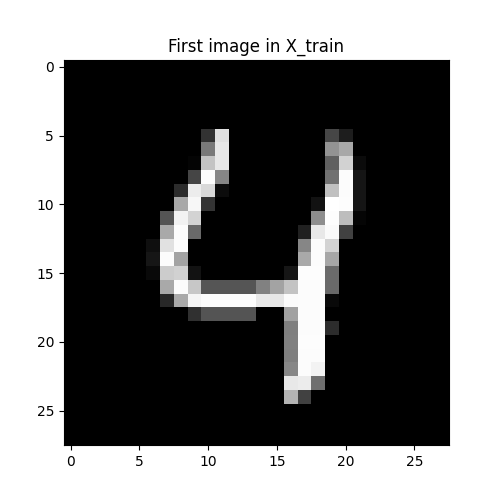

7


In [ ]:
def display_image(image, title=None):
    # Reshape the image if it's flattened
    if image.ndim == 1:
        image = image.reshape(28, 28)  # Assuming MNIST 28x28 images
    
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
    #plt.axis('off')  # Hide the axes
    if title:
        plt.title(title)
    plt.show()

# Display the first image in X_train
display_image(X_test[4], "First image in X_train")
print(y_test[yo])



In [ ]:
check= X_test.shape
cnt=0
for i in range(1000):
    prediction = model.predict(X_test[i].reshape(1,784))  
    if(y_test[i]!=np.argmax(prediction)):
      cnt+=1
      #display_image(X_test[i], "First image in X_train")
      #print(y_test[i])
      #print(np.argmax(prediction))             
print(cnt)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

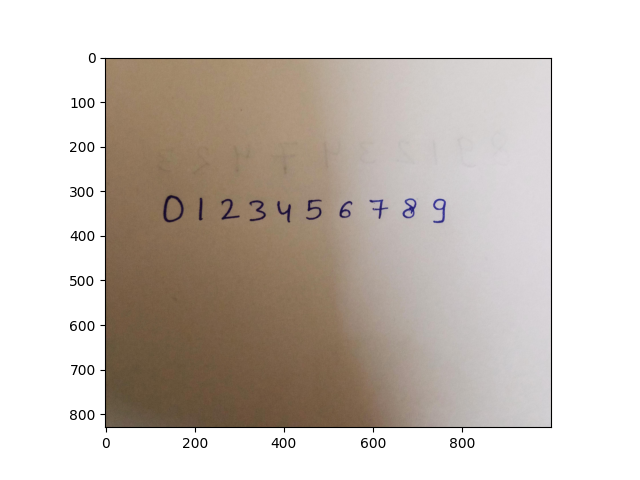

In [ ]:


# Load your image (replace 'path_to_your_image.jpg' with your actual image path)
image_path = r'C:\Users\abhis\OneDrive\Desktop\aiproject.jpg'  # Adjust with your actual image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, c = img.shape
if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)

plt.figure()  # Create a new figure
plt.imshow(img);
plt.show()

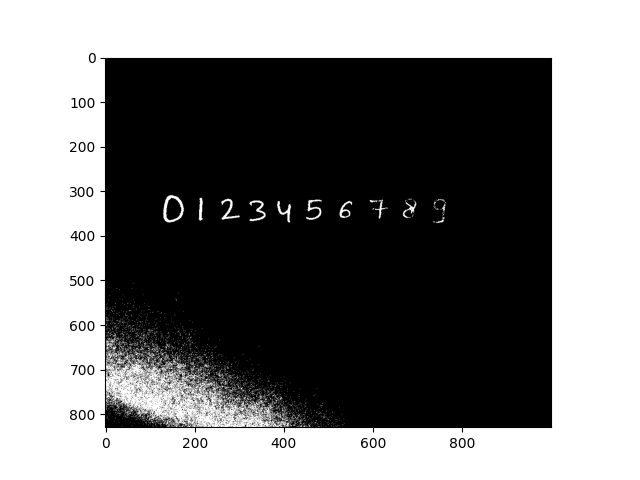

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.figure()  # Create a new figure
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img)
plt.show()


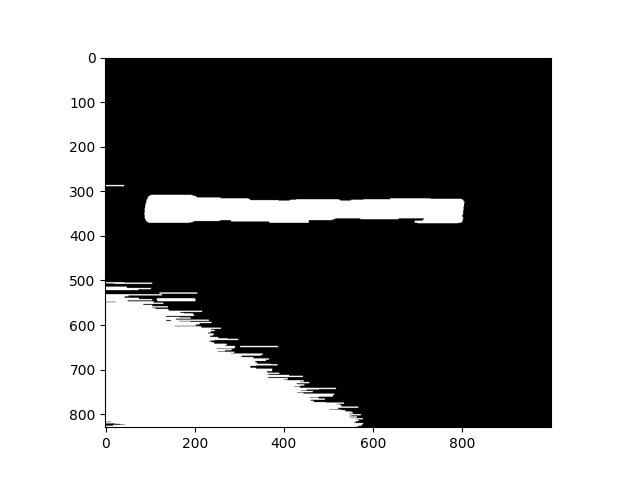

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.figure()  # Create a new figure
plt.imshow(dilated, cmap='gray')
plt.show()

In [ ]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

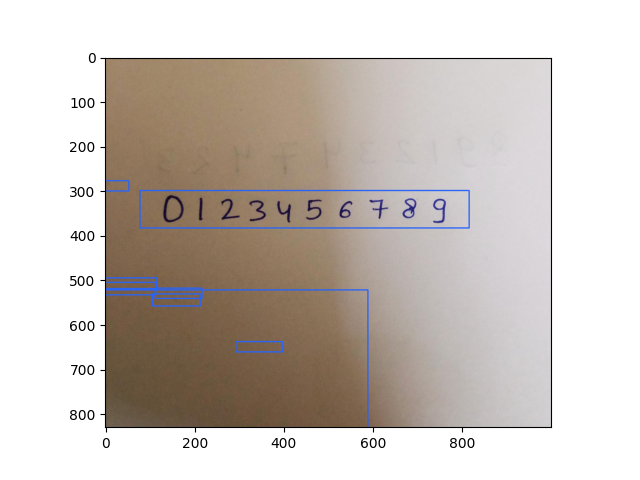

In [ ]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x-10,y-10), (x+w+10, y+h+10), (40, 100, 250), 2)
plt.figure()  # Create a new figure
plt.imshow(img2);
plt.show()

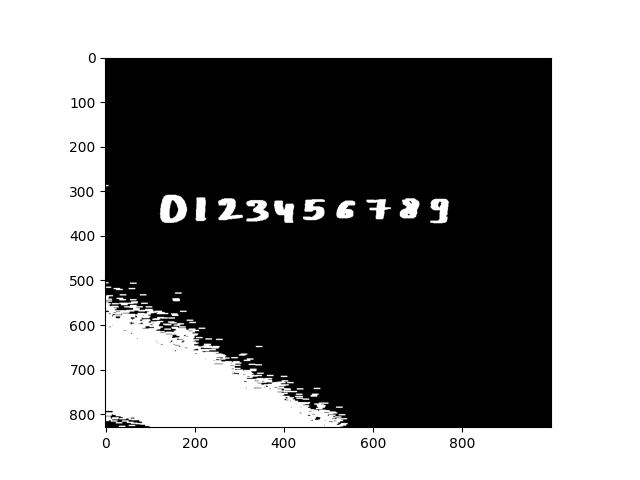

In [ ]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.figure()  # Create a new figure
plt.imshow(dilated2, cmap='gray');
plt.show()  

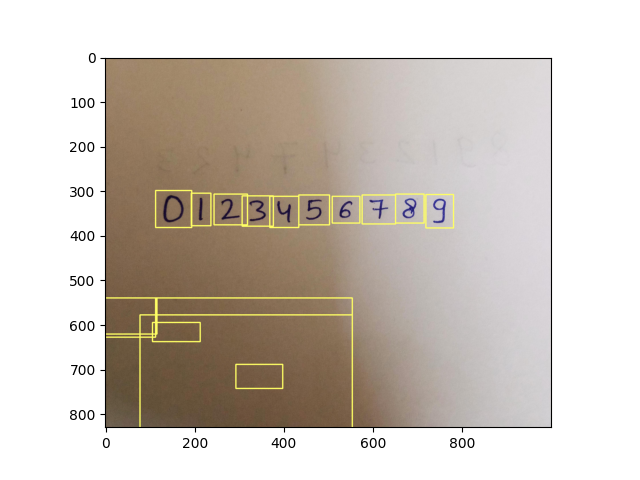

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2-10, y+y2-10, x+x2+w2+10, y+y2+h2+10])
        cv2.rectangle(img3, (x+x2-10, y+y2-10), (x+x2+w2+10, y+y2+h2+10), (255,255,100),2)
plt.figure()  # Create a new figure
plt.imshow(img3);
plt.show()

(28, 28)


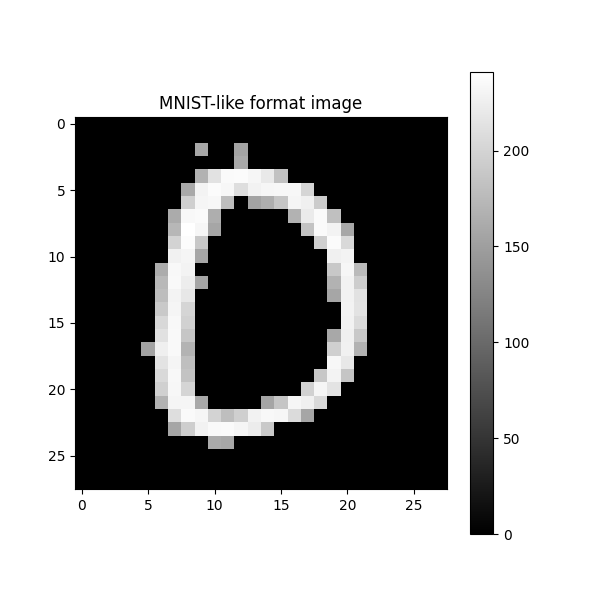

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 Largest Prediction index: 0
(28, 28)


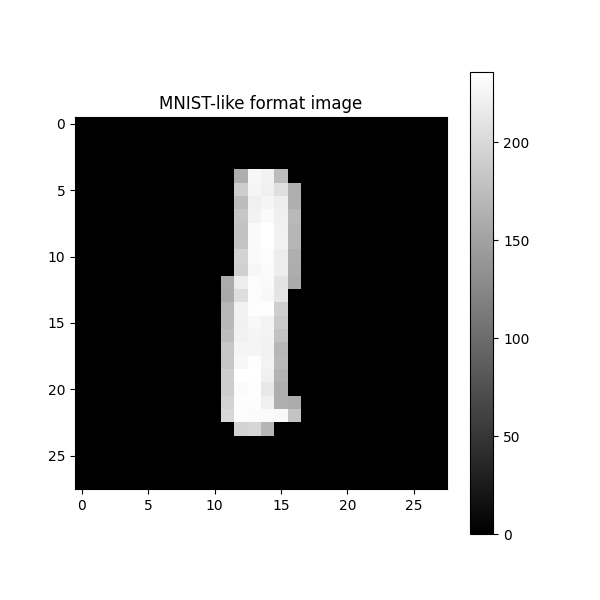

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 Largest Prediction index: 1
(28, 28)


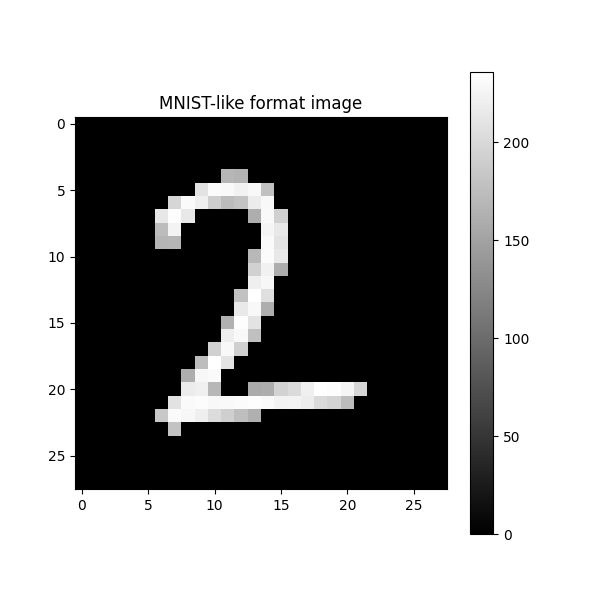

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
 Largest Prediction index: 2
(28, 28)


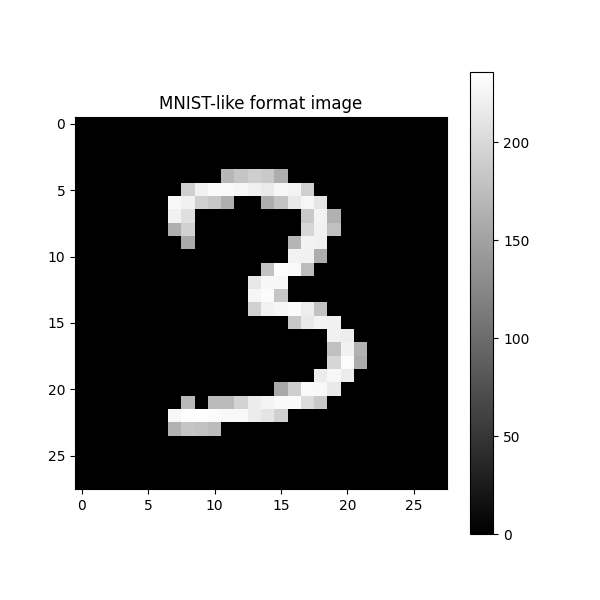

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Largest Prediction index: 3
(28, 28)


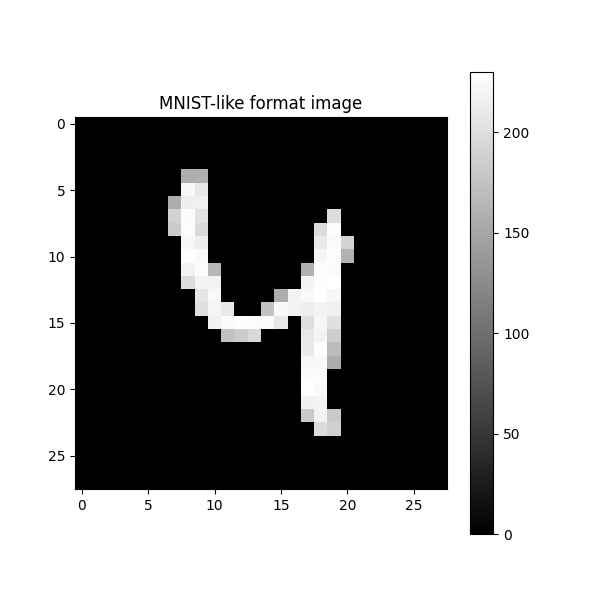

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 Largest Prediction index: 4
(28, 28)


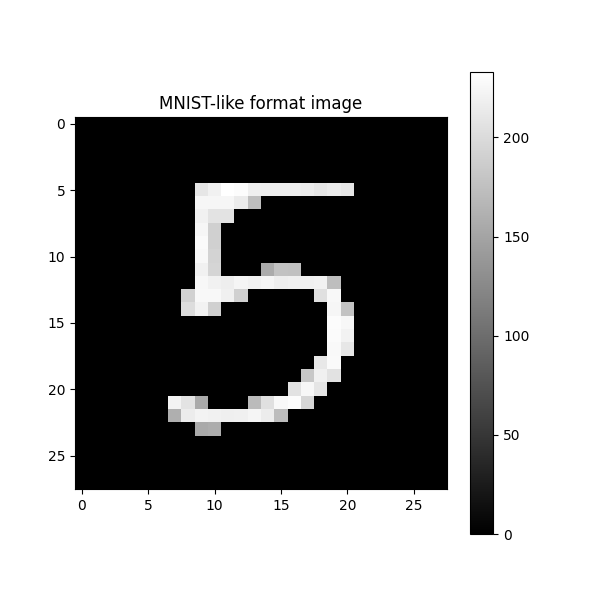

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 Largest Prediction index: 5
(28, 28)


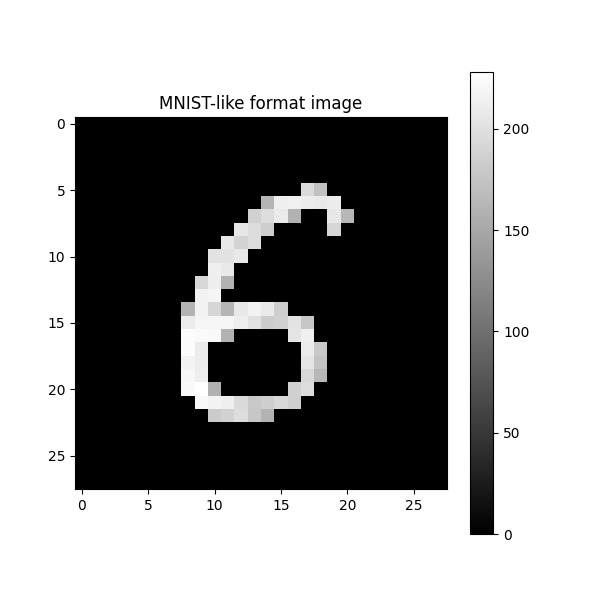

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 Largest Prediction index: 6
(28, 28)


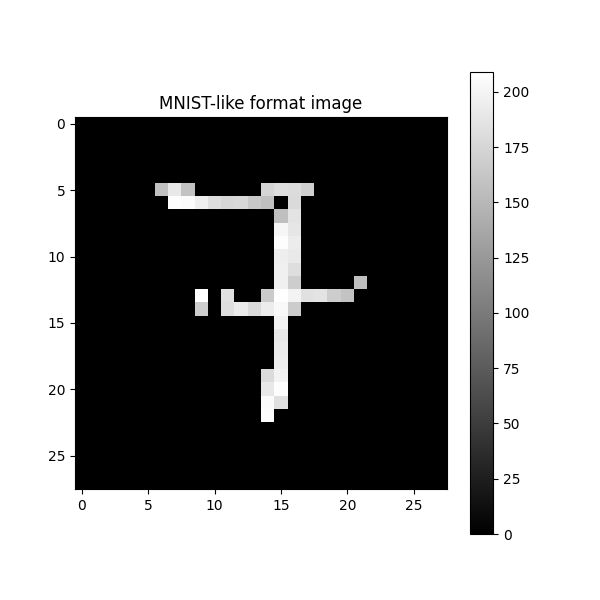

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 Largest Prediction index: 3
(28, 28)


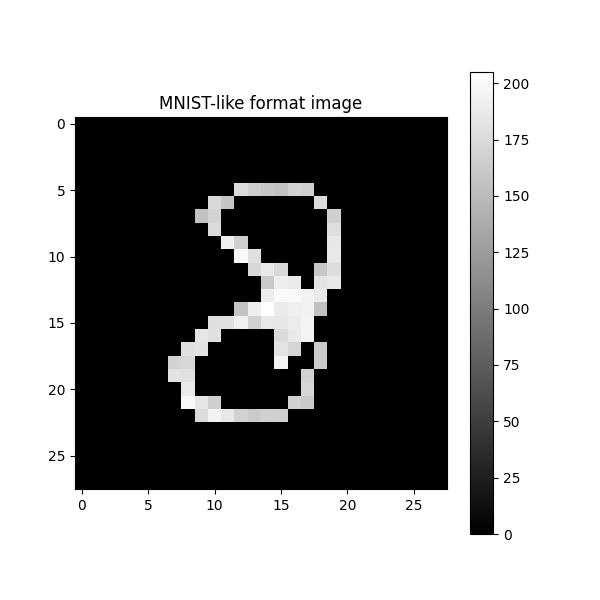

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
 Largest Prediction index: 8
(28, 28)


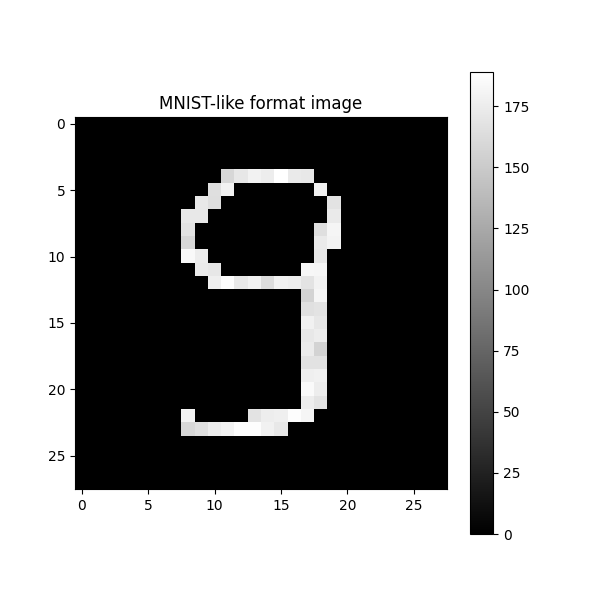

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Largest Prediction index: 3


In [ ]:
for i in range(10):
    ninth_word = words_list[i+1]
    roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]

    # Convert to grayscale if it's not already
    if len(roi_9.shape) == 3:
        gray = cv2.cvtColor(roi_9, cv2.COLOR_BGR2GRAY)
    else:
        gray = roi_9

    # Resize to 28x28 to match MNIST format
    mnist_format_image = cv2.resize(gray, (28, 28))
    print(mnist_format_image.shape)
    # Invert the image (optional, depends on your original image)
    # MNIST typically has white digits on black background
    mnist_format_image = 255 - mnist_format_image

    # Normalize pixel values to range 0-1 (optional, but often useful for machine learning models)
    #mnist_format_image = mnist_format_image.astype('float32') / 255.0

    threshold = 155
    mnist_format_image[mnist_format_image < threshold] = 0  # Set values below threshold to 0 (black)




    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(mnist_format_image, cmap='gray')
    plt.colorbar()  # This will show the intensity scale
    plt.title('MNIST-like format image')
    plt.show()

    prediction = model.predict(mnist_format_image.reshape(1,784))
    print(f" Largest Prediction index: {np.argmax(prediction)}")    



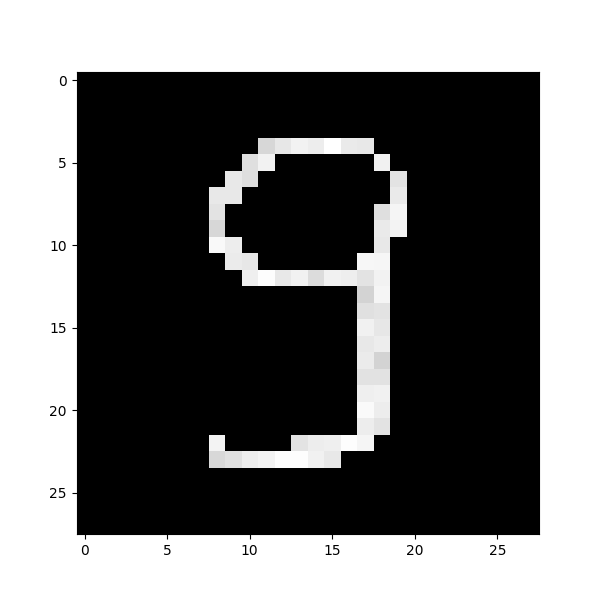

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: [[-93.48   6.83  12.8   21.98 -63.99  12.71 -51.89   4.75  16.58  10.9 ]]
 Largest Prediction index: 3


In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(mnist_format_image, cmap='gray')
plt.show()
prediction = model.predict(mnist_format_image.reshape(1,784))
print(f"Prediction: {prediction}")  
print(f" Largest Prediction index: {np.argmax(prediction)}")